# Arbeta med data från verkligheten


Via [SMHI](https://vattenwebb.smhi.se/station/#) kan man få ut vattenflöden från olika mätstationer runt om i landet. 

Exempel på vattenkraftverk med mätstationer:
- Porjus
- Älvkarleby
- Lima
- Sikfors

<mark>Frågeställning: Kan vi från datat räkna ut hur mycket energi som produceras ett år (t.ex. 2019)?</mark>

Vi ska i denna uppgift titta närmare på **Porjus kraftverk**.

Gå in på SMHI-länken ovan och sök fram "Porjus".


## 0. Förberedelser

Vi kommer behöva tre bibliotek för detta: `numpy`, `matplotlib` och `pandas`

Kör cellen nedan för att importera dessa bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Ladda ner data från SMHI


1. Ladda hem `.xls`-filen med datat till din dator. Döp om filen till något kort och enkelt, förslagsvis `porjus.xls`.
2. Ta reda på lite fakta om vattenkraftverket: fallhöjden, m.m. Spara fallhöjden nedan eftersom du kommer behöva den senare.


In [2]:
height = 60 # fyll i fallhöjden på vattenkraftverket här

## 2. Ladda upp datat hit till Jupyter

Uppe till vänster ser du en uppladdningssymbol (pil uppåt). Klicka på den för att ladda upp filen till den här mappen.

## 3. Läs in datat med pandas

- [Read XLS with pandas](https://pythonspot.com/read-xls-with-pandas/)

döp variabeln till `df` (för DataFrame)

In [3]:
# Do stuff here
df = pd.read_excel("data/porjus.xls", header=13)

## 4. Utforska och "städa" datat

Använd `head`, `tail`, `columns`, `dtypes` för att lära dig mer om hur datat ser ut.

Till exempel:
````python
df.head(3)
```` 

````python
df.columns
```` 

### Utforska datamängden
1. Vilken rad startar det riktiga datat på?
2. När är äldsta mätvärdet ifrån? När är sista mätvärdet ifrån?
3. Hur många rader innehåller datat?
4. Vad har kolumnerna för datatyper i nuläget?
5. Vad representerar kolumnerna?
6. Vad är högsta och lägsta flödet i hela datamängden?
7. Vad mer noterar du?


In [4]:
# Do stuff here
df.dtypes

Unnamed: 0                     object
Vattenföring [m³/s]           float64
Datakontroll\nvattenföring     object
dtype: object

## 5. Städa datat

- Vi måste fixa så att DataFramen börjar på rätt rad. Ändra inläsningen `read_excel` och ange explicit header nummer (se [här](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)). Kolla `head` sen igen och se om det ser bra ut.

- Döp om kolumnerna med hjälp av `df.columns` till något enklare

- Vi har ytterligare ett problem. Datum-kolumnen är bara strängar nu och inte faktiska datum. Men det kan vi ordna! Använd `pd.to_datetime(...)` och skriv över datum-kolumnen

In [5]:
# Do stuff here
df.columns = ["Date", "Flow", "Verified"]
df["Date"] = pd.to_datetime(df["Date"])

## 5.b Plotta datat!

Vi vill såklart se datat!


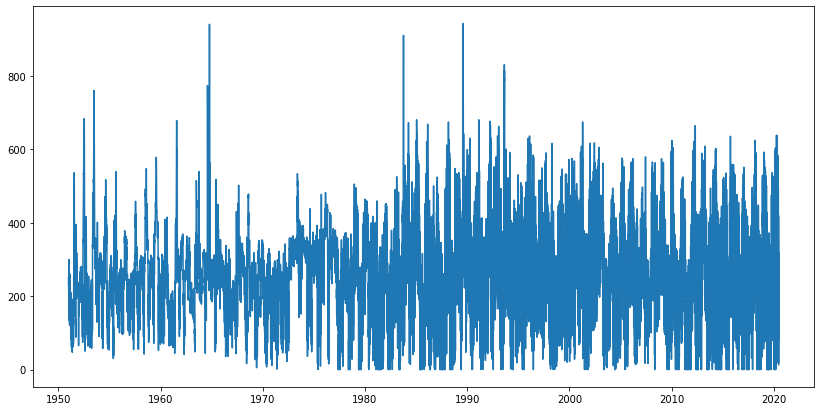

In [6]:
# Do stuff here
fig, ax = plt.subplots()
ax.plot(df["Date"], df["Flow"])
fig.set_size_inches(14, 7)

## 6. Filtrera data

Vi vill bara kolla på året 2019. Filtrera datat och spara resultatet i en ny dataframe `df2`.


In [7]:
# Do stuff here
df2 = df[(df["Date"] > "2018-12-31") & (df["Date"] < "2020-01-01")]
df2.tail()

,Date,Flow,Verified
25197,2019-12-27,425.0,Kontrollerat
25198,2019-12-28,304.0,Kontrollerat
25199,2019-12-29,103.0,Kontrollerat
25200,2019-12-30,116.0,Kontrollerat
25201,2019-12-31,244.0,Kontrollerat


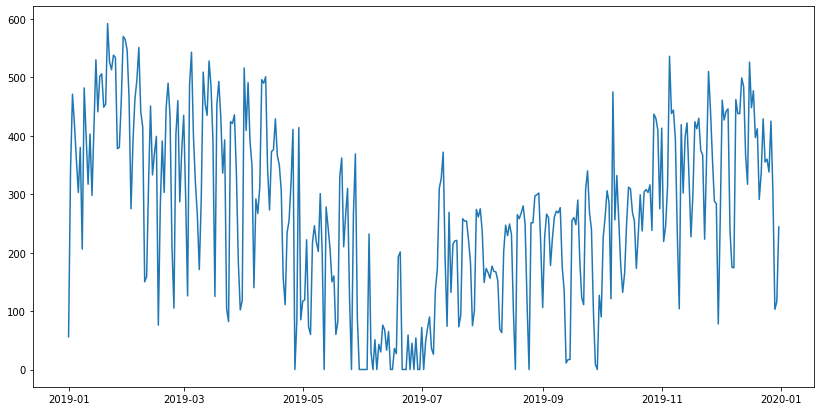

In [8]:
fig, ax = plt.subplots()
ax.plot(df2["Date"], df2["Flow"])
fig.set_size_inches(14, 7)

## 7. Besvara frågeställningar om energiproduktionen

- Vad är den högsta effekten under 2019 för vattenkraftverket Porjus?
- Vad är medeleffekten under hela året?
- Plotta effekten över året 2019
- <mark>Hur mycket energi producerades under 2019?</mark>
- Vad mer?

Du behöver använd din tidigare `hydro_power`-funktion som översätter vattenflöde (m^3/s) till effekt (W). Kopiera in funktionen i denna notebook.


In [9]:
# Do stuff here

def hydro_power(volume_flow, height, efficiency=0.8):
    density_of_water = 1000 # kg/m3
    g = 9.82 # m/s2
    
    mass_flow = volume_flow * density_of_water
    
    return mass_flow * g * height


In [10]:
df2.insert(2, "Power", hydro_power(df2["Flow"], height))
df2

,Date,Flow,Power,Verified
24837,2019-01-01,56.0,32995200.0,Kontrollerat
24838,2019-01-02,341.0,200917200.0,Kontrollerat
24839,2019-01-03,471.0,277513200.0,Kontrollerat
24840,2019-01-04,420.0,247464000.0,Kontrollerat
24841,2019-01-05,359.0,211522800.0,Kontrollerat
...,...,...,...,...
25197,2019-12-27,425.0,250410000.0,Kontrollerat
25198,2019-12-28,304.0,179116800.0,Kontrollerat
25199,2019-12-29,103.0,60687600.0,Kontrollerat
25200,2019-12-30,116.0,68347200.0,Kontrollerat


## Vad representerar den nya kolumnen?

Nu har vi en ny kolumn "Power" som är i enheten W.

Varje värde i kolumnen representerar **(medel)effekten den dagen framräknat från det (medel)flöde som gällde den dagen, enligt datat.**

Det vi i praktik gjort är multiplicera varje värde med ett visst givet tal (densitet, tyngdacceleration och fallhöjd). Kurvan skulle därför se likadan ut, bara "uppblåst".


## Gå från effekt till total energi

Om du producerar en viss effekt, t.ex. 1 W under 1 dag (24h) så har du totalt producerat 1 W * 24 h = 24 Wh under den dagen.
Om du producerar 3 W under 5 dagar så har du totalt producerat 3 W * (5 * 24 h) = 360 Wh

Vi behöver därför bara göra följande för att gå från våra timvisa effekt-värden till en total energi:
1. multiplicera varje värde med 24 h, för att få ut hur mycket energi som producerats den dagen
2. summera alla värden

((Punkt 1 och 2 kan göras i vilken ordning som helst då (24 * x1 + 24 * x2 + 24 * x3 + 24 * x4 + 24 * x5) = 24 * (x1 + + x2 + x3 + x4 + x5)))


In [11]:
df2.insert(3, "Energy", 24 * df2["Power"])

In [12]:
df2

,Date,Flow,Power,Energy,Verified
24837,2019-01-01,56.0,32995200.0,7.918848e+08,Kontrollerat
24838,2019-01-02,341.0,200917200.0,4.822013e+09,Kontrollerat
24839,2019-01-03,471.0,277513200.0,6.660317e+09,Kontrollerat
24840,2019-01-04,420.0,247464000.0,5.939136e+09,Kontrollerat
24841,2019-01-05,359.0,211522800.0,5.076547e+09,Kontrollerat
...,...,...,...,...,...
25197,2019-12-27,425.0,250410000.0,6.009840e+09,Kontrollerat
25198,2019-12-28,304.0,179116800.0,4.298803e+09,Kontrollerat
25199,2019-12-29,103.0,60687600.0,1.456502e+09,Kontrollerat
25200,2019-12-30,116.0,68347200.0,1.640333e+09,Kontrollerat


In [18]:
mean_MWh_per_day = round(df2["Power"].mean() / (1000*1000), 1)
print(f"{mean_MWh_per_day} MWh per day was produced on average in 2019")

156.4 MWh per day was produced on average in 2019


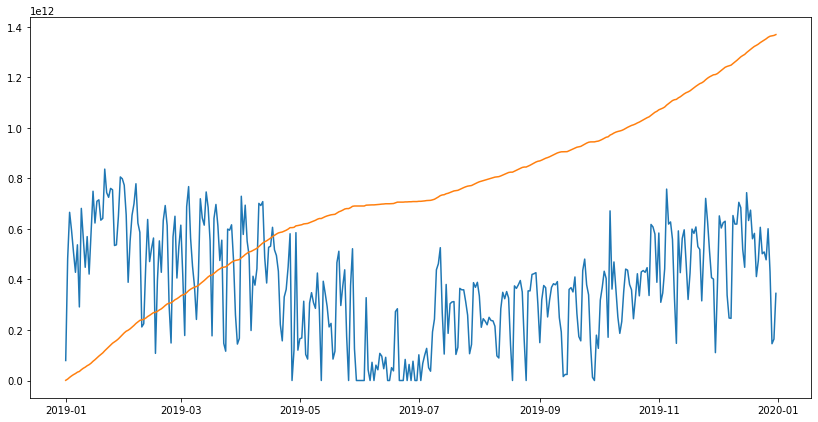

In [13]:

fig, ax = plt.subplots()
ax.plot(df2["Date"], df2["Energy"] * 100, df2["Date"], df2["Energy"].cumsum())
fig.set_size_inches(14, 7)


# Om du blir klar

- Utforska datat mer
- Förfina plottarna!
- Utforska ett annat vattenkraftverk
- Lär dig mer om matplotlib, numpy och pandas
- Lägg in en fin bild av ditt vattenkraftverk här i notebooken (du kan använda en vanlig html img-tag och ange en url)

(PS. För den nyfikne: det går även att hämta data direkt från ett API [här](https://www.dataportal.se/sv/datasets/78_1998/seacmf-hydrologiska-observationer-vattenforing#ref=?p=2&q=vatten%20fl%C3%B6de&s=2&t=20&f=&rt=dataset%24esterms_IndependentDataService%24esterms_ServedByDataService))


In [19]:
total_energy_in_GWh = round(df2["Energy"].sum() / (1000*1000*1000), 1)

print(f"{total_energy_in_GWh} GWh")

1369.8 GWh
